In [1]:
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import dateutil.parser

/Users/mercybenzaquen/.virtualenvs/Homework12/lib/python3.5/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/mercybenzaquen/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


> First, I made a mistake naming the data set! **It's 2015 data, not 2014 data.** But yes, still use `311-2014.csv`. You can rename it.

# Importing and preparing your data

Import your data, but **only the first 200,000 rows**. You'll also want to change the index to be a datetime based on the **Created Date** column - you'll want to check if it's already a datetime, and parse it if not.

In [3]:
#df = pd.read_csv("small-311-2015.csv")
df = pd.read_csv("311-2014.csv", nrows=200000)

df.head(2)

/usr/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (8,17,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31015465,07/06/2015 10:58:27 AM,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,11360,27-16 203 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.773540,-73.788237,"(40.773539552542, -73.78823697228408)"
1,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.767021,-73.979448,"(40.76702142171206, -73.97944780718524)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 53 columns):
Unique Key                        200000 non-null int64
Created Date                      200000 non-null object
Closed Date                       188913 non-null object
Agency                            200000 non-null object
Agency Name                       200000 non-null object
Complaint Type                    200000 non-null object
Descriptor                        198197 non-null object
Location Type                     179328 non-null object
Incident Zip                      181049 non-null object
Incident Address                  152173 non-null object
Street Name                       152152 non-null object
Cross Street 1                    108035 non-null object
Cross Street 2                    107583 non-null object
Intersection Street 1             24790 non-null object
Intersection Street 2             24530 non-null object
Address Type                      177

In [5]:
def parse_date (str_date):
    return dateutil.parser.parse(str_date)

df['created_dt']= df['Created Date'].apply(parse_date)

df.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_dt
0,31015465,07/06/2015 10:58:27 AM,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,11360,27-16 203 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.773540,-73.788237,"(40.773539552542, -73.78823697228408)",2015-07-06 10:58:27
1,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,40.767021,-73.979448,"(40.76702142171206, -73.97944780718524)",2015-07-03 13:26:29
2,31950223,11/09/2015 03:55:09 AM,11/09/2015 08:08:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453,1993 GRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.852671,-73.910608,"(40.85267061877697, -73.91060771362552)",2015-11-09 03:55:09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 54 columns):
Unique Key                        200000 non-null int64
Created Date                      200000 non-null object
Closed Date                       188913 non-null object
Agency                            200000 non-null object
Agency Name                       200000 non-null object
Complaint Type                    200000 non-null object
Descriptor                        198197 non-null object
Location Type                     179328 non-null object
Incident Zip                      181049 non-null object
Incident Address                  152173 non-null object
Street Name                       152152 non-null object
Cross Street 1                    108035 non-null object
Cross Street 2                    107583 non-null object
Intersection Street 1             24790 non-null object
Intersection Street 2             24530 non-null object
Address Type                      177

What was the **most popular type of complaint**, and how many times was it filed?

In [6]:
df["Complaint Type"].value_counts().head(1)


Blocked Driveway    21779
Name: Complaint Type, dtype: int64

Make a horizontal bar graph of the **top 5 most frequent complaint types**.

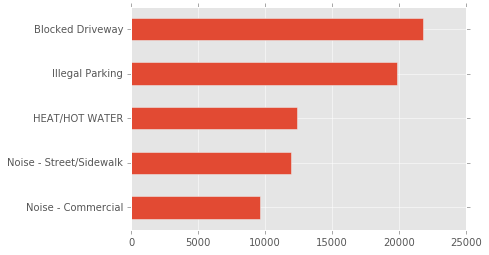

In [63]:
df["Complaint Type"].value_counts().head(5).sort_values().plot(kind='barh')


Which borough has the **most complaints per capita?** Since it's only 5 boroughs, you can do the math manually.

In [8]:
df["Borough"].value_counts()

BROOKLYN         57129
QUEENS           46824
MANHATTAN        42050
BRONX            29610
Unspecified      17000
STATEN ISLAND     7387
Name: Borough, dtype: int64

In [9]:
people_bronx= 1438159
people_queens= 2321580
people_manhattan=1636268
people_brooklyn= 2621793
people_staten_island= 473279



In [10]:
complaints_per_capita_bronx= 29610/people_bronx
complaints_per_capita_bronx

0.020588822237318682

In [11]:
complaints_per_capita_queens=46824/people_queens
complaints_per_capita_queens

0.020169022820665235

In [12]:
complaints_per_capita_manhattan=42050/people_manhattan
complaints_per_capita_manhattan

0.025698724169879263

In [13]:
complaints_per_capita_staten_island=473279/people_staten_island
complaints_per_capita_staten_island

1.0

In [14]:
complaints_per_capita_brooklyn=2621793/people_brooklyn
complaints_per_capita_brooklyn

1.0

According to your selection of data, **how many cases were filed in March?** How about May?

In [15]:
df.index = df['created_dt']
#del df['Created Date']

df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_dt
created_dt,,,,,,,,,,,,,,,,,,,,,
2015-07-06 10:58:27,31015465,07/06/2015 10:58:27 AM,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,11360,27-16 203 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.773540,-73.788237,"(40.773539552542, -73.78823697228408)",2015-07-06 10:58:27
2015-07-03 13:26:29,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,40.767021,-73.979448,"(40.76702142171206, -73.97944780718524)",2015-07-03 13:26:29
2015-11-09 03:55:09,31950223,11/09/2015 03:55:09 AM,11/09/2015 08:08:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453,1993 GRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.852671,-73.910608,"(40.85267061877697, -73.91060771362552)",2015-11-09 03:55:09
2015-07-03 02:18:32,31000038,07/03/2015 02:18:32 AM,07/03/2015 07:54:48 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11372,84-16 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.755774,-73.883262,"(40.755773786469966, -73.88326243225418)",2015-07-03 02:18:32
2015-07-04 00:03:27,30995614,07/04/2015 12:03:27 AM,07/04/2015 03:33:09 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11216,1057 BERGEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.676175,-73.951269,"(40.67617516102934, -73.9512690004692)",2015-07-04 00:03:27


In [16]:
print("There were", len(df['2015-03']), "cases filed in March")

There were 15025 cases filed in March


In [17]:
print("There were", len(df['2015-05']), "cases filed in May")

There were 49715 cases filed in May


I'd like to see all of the 311 complaints **called in on April 1st.**

> **Surprise!** We couldn't do this in class, but it was just a limitation of our data set

In [18]:
df['2015-04-01']

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_dt
created_dt,,,,,,,,,,,,,,,,,,,,,
2015-04-01 21:37:42,30311691,04/01/2015 09:37:42 PM,04/01/2015 10:49:33 PM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11234,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.609810,-73.922498,"(40.60980966645303, -73.92249759633725)",2015-04-01 21:37:42
2015-04-01 23:12:04,30307701,04/01/2015 11:12:04 PM,04/01/2015 11:32:40 PM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11205,700 MYRTLE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.694644,-73.955504,"(40.694643700748486, -73.95550356170298)",2015-04-01 23:12:04
2015-04-01 13:10:35,30313389,04/01/2015 01:10:35 PM,04/07/2015 04:01:08 PM,DPR,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,Street,11422,245-16 149 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.653016,-73.738626,"(40.653016256598534, -73.73862588133056)",2015-04-01 13:10:35
2015-04-01 17:37:38,30314393,04/01/2015 05:37:38 PM,04/03/2015 11:40:54 AM,DPR,Department of Parks and Recreation,Maintenance or Facility,Hours of Operation,Park,11211,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-01 17:37:38
2015-04-01 12:32:40,30309207,04/01/2015 12:32:40 PM,04/17/2015 01:06:49 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Installation/Work Quality,NaN,11423,90-71 198 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.714299,-73.761158,"(40.71429859671565, -73.76115807774032)",2015-04-01 12:32:40
2015-04-01 18:44:50,30311759,04/01/2015 06:44:50 PM,06/24/2015 11:27:00 AM,DPR,Department of Parks and Recreation,Damaged Tree,Entire Tree Has Fallen Down,Street,10467,862 EAST 213 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.878028,-73.860237,"(40.87802828144708, -73.86023734606933)",2015-04-01 18:44:50
2015-04-01 16:30:15,30309690,04/01/2015 04:30:15 PM,04/01/2015 11:27:22 PM,NYPD,New York City Police Department,Animal Abuse,Neglected,Residential Building/House,11368,107-15 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.757811,-73.861677,"(40.757811195752154, -73.86167714731972)",2015-04-01 16:30:15
2015-04-01 09:04:07,30307990,04/01/2015 09:04:07 AM,04/06/2015 09:17:10 AM,DOF,Senior Citizen Rent Increase Exemption Unit,SCRIE,Miscellaneous,Senior Address,10027,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-01 09:04:07
2015-04-01 07:46:58,30308253,04/01/2015 07:46:58 AM,04/01/2015 09:32:31 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11370,32-51 80 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.756412,-73.887405,"(40.75641194675221, -73.88740503059863)",2015-04-01 07:46:58


What was the most popular type of complaint on April 1st?

What were the **most popular three types of complaint** on April 1st

In [19]:
df['2015-04-01']['Complaint Type'].value_counts().head(3)

Illegal Parking     67
Street Condition    64
Blocked Driveway    58
Name: Complaint Type, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 200000 entries, 2015-07-06 10:58:27 to 2015-06-09 12:48:25
Data columns (total 54 columns):
Unique Key                        200000 non-null int64
Created Date                      200000 non-null object
Closed Date                       188913 non-null object
Agency                            200000 non-null object
Agency Name                       200000 non-null object
Complaint Type                    200000 non-null object
Descriptor                        198197 non-null object
Location Type                     179328 non-null object
Incident Zip                      181049 non-null object
Incident Address                  152173 non-null object
Street Name                       152152 non-null object
Cross Street 1                    108035 non-null object
Cross Street 2                    107583 non-null object
Intersection Street 1             24790 non-null object
Intersection Street 2             24530 non-null object
Add

**What month has the most reports filed?** How many? Graph it.

In [21]:
df.resample('M').count()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_dt
created_dt,,,,,,,,,,,,,,,,,,,,,
2015-01-31,7091,7091,6583,7091,7091,7091,7051,6547,6418,5308,...,76,75,75,7,2,8,6181,6181,6181,7091
2015-02-28,8141,8141,7631,8141,8141,8141,8100,7508,7515,6097,...,121,121,121,18,4,17,7274,7274,7274,8141
2015-03-31,15025,15025,14305,15025,15025,15025,14931,13742,13833,10775,...,704,702,702,20,10,22,13444,13444,13444,15025
2015-04-30,20087,20087,19131,20087,20087,20087,19921,17250,17292,13809,...,311,307,346,15,9,18,16692,16692,16692,20087
2015-05-31,49715,49715,47090,49715,49715,49715,49287,42564,42611,36206,...,303,301,393,33,17,45,41381,41381,41381,49715
2015-06-30,14459,14459,13416,14459,14459,14459,14341,12274,12474,10460,...,83,81,99,16,5,18,12067,12067,12067,14459
2015-07-31,15047,15047,13908,15047,15047,15047,14789,14121,14395,11430,...,75,74,74,13,11,26,13864,13864,13864,15047
2015-08-31,12204,12204,11408,12204,12204,12204,12022,11266,11753,9556,...,53,52,52,12,12,18,11336,11336,11336,12204
2015-09-30,13679,13679,12911,13679,13679,13679,13492,12790,13024,10769,...,78,78,85,3,4,10,12551,12551,12551,13679


In [22]:
df.resample('M').index[0]

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  if __name__ == '__main__':


Timestamp('2015-01-31 00:00:00', offset='M')

In [23]:
import numpy as np
np.__version__

'1.11.1'

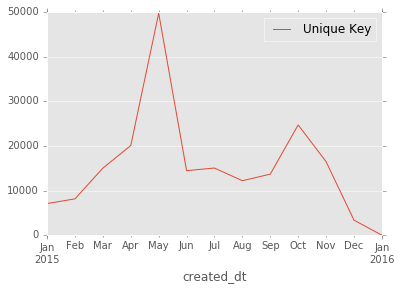

In [24]:
df.resample('M').count().plot(y="Unique Key")

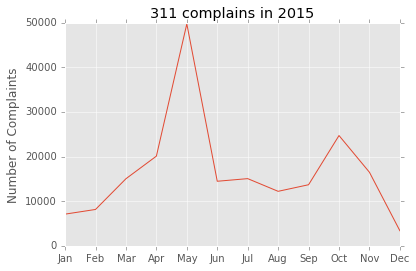

In [25]:
ax= df.groupby(df.index.month).count().plot(y='Unique Key', legend=False)
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11, 12])
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_ylabel("Number of Complaints")
ax.set_title("311 complains in 2015")

**What week of the year has the most reports filed?** How many? Graph the weekly complaints.

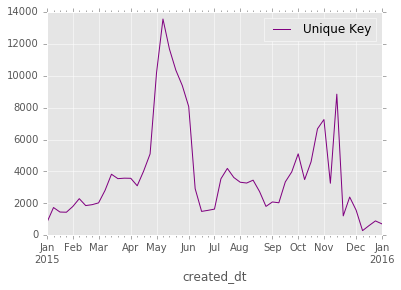

In [64]:
#df.resample('W').count().head(5)
df.resample('W').count().plot(y="Unique Key", color= "purple")

Noise complaints are a big deal. Use `.str.contains` to select noise complaints, and make an chart of when they show up annually. **Then** make a chart about when they show up every day (cyclic).

In [27]:
df[df['Complaint Type'].str.contains("Noise")].head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_dt
created_dt,,,,,,,,,,,,,,,,,,,,,
2015-07-03 02:18:32,31000038,07/03/2015 02:18:32 AM,07/03/2015 07:54:48 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11372,84-16 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.755774,-73.883262,"(40.755773786469966, -73.88326243225418)",2015-07-03 02:18:32
2015-07-04 00:03:27,30995614,07/04/2015 12:03:27 AM,07/04/2015 03:33:09 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11216,1057 BERGEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.676175,-73.951269,"(40.67617516102934, -73.9512690004692)",2015-07-04 00:03:27
2015-09-09 21:59:03,31492526,09/09/2015 09:59:03 PM,09/09/2015 11:17:39 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11238,238 SAINT JAMES PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.683308,-73.963775,"(40.68330795503152, -73.96377504548408)",2015-09-09 21:59:03
2015-04-28 18:26:58,30502370,04/28/2015 06:26:58 PM,04/28/2015 07:29:34 PM,NYPD,New York City Police Department,Noise - Commercial,Car/Truck Music,Store/Commercial,10035,1911 MADISON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.804617,-73.941505,"(40.80461674564084, -73.9415053197214)",2015-04-28 18:26:58
2015-05-21 19:01:52,30668699,05/21/2015 07:01:52 PM,05/21/2015 09:56:29 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10026,8 WEST 111 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.797731,-73.949399,"(40.79773121644539, -73.94939942634502)",2015-05-21 19:01:52


In [28]:
noise_df= df[df['Complaint Type'].str.contains("Noise")]


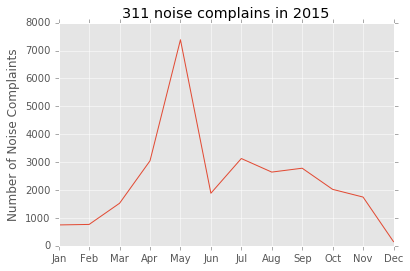

In [29]:
noise_graph= noise_df.groupby(noise_df.index.month).count().plot(y='Unique Key', legend=False)
noise_graph.set_xticks([1,2,3,4,5,6,7,8,9,10,11, 12])
noise_graph.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
noise_graph.set_ylabel("Number of Noise Complaints")
noise_graph.set_title("311 noise complains in 2015")

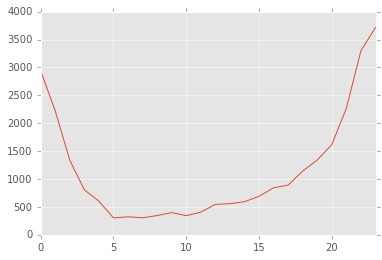

In [65]:
noise_df.groupby(by=noise_df.index.hour)['Unique Key'].count().plot()

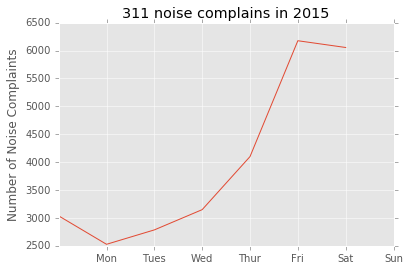

In [30]:
noise_graph= noise_df.groupby(noise_df.index.dayofweek).count().plot(y='Unique Key', legend=False)
noise_graph.set_xticks([1,2,3,4,5,6,7])
noise_graph.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
noise_graph.set_ylabel("Number of Noise Complaints")
noise_graph.set_title("311 noise complains in 2015")

**Which were the top five days of the year for filing complaints?** How many on each of those days? Graph it.

In [31]:
daily_count= df['Unique Key'].resample('D').count().sort_values(ascending=False)
top_5_days= daily_count.head(5)
top_5_days

created_dt
2015-10-28    2697
2015-11-09    2529
2015-05-04    2465
2015-05-11    2293
2015-10-29    2258
Name: Unique Key, dtype: int64

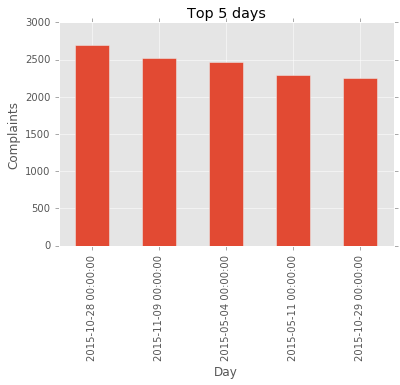

In [32]:
ax = top_5_days.plot(kind='bar') # I dont know how to put names to the labels
ax.set_title("Top 5 days")
ax.set_xlabel("Day")
ax.set_ylabel("Complaints")

**What hour of the day are the most complaints?** Graph a day of complaints.

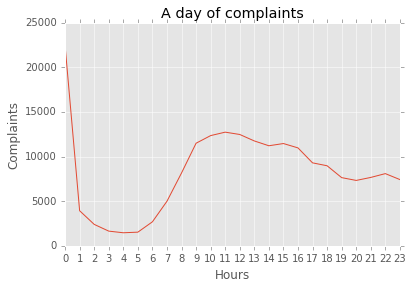

In [33]:
hour_graph= df.groupby(df.index.hour).count().plot(y='Unique Key', legend=False)
hour_graph.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
hour_graph.set_title("A day of complaints")
hour_graph.set_xlabel("Hours")
hour_graph.set_ylabel("Complaints")


One of the hours has an odd number of complaints. What are the most common complaints at that hour, and what are the most common complaints the hour before and after?

In [34]:
twelve_am_complaints= df[df.index.hour <1]

In [35]:
twelve_am_complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_dt
created_dt,,,,,,,,,,,,,,,,,,,,,
2015-07-04 00:03:27,30995614,07/04/2015 12:03:27 AM,07/04/2015 03:33:09 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11216,1057 BERGEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.676175,-73.951269,"(40.67617516102934, -73.9512690004692)",2015-07-04 00:03:27
2015-07-09 00:00:00,31042454,07/09/2015 12:00:00 AM,07/20/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Standing Water,Other - Explain Below,Other,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-09 00:00:00
2015-07-09 00:00:00,31037751,07/09/2015 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Standing Water,Puddle in Ground,3+ Family Apartment Building,10016,379 THIRD AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.741537,-73.981163,"(40.741536747969185, -73.98116258383294)",2015-07-09 00:00:00
2015-06-29 00:26:39,30956584,06/29/2015 12:26:39 AM,06/29/2015 04:27:24 AM,NYPD,New York City Police Department,Noise - Park,Loud Talking,Park/Playground,11377,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.741280,-73.902565,"(40.741280237793646, -73.90256544457489)",2015-06-29 00:26:39
2015-07-02 00:09:59,30986795,07/02/2015 12:09:59 AM,07/02/2015 12:37:47 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10035,20 PALADINO AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.800365,-73.931212,"(40.80036497064086, -73.9312115560449)",2015-07-02 00:09:59


In [36]:
twelve_am_complaints['Complaint Type'].value_counts().head(5)

HEAT/HOT WATER          4534
Rodent                  2112
PAINT/PLASTER           1946
UNSANITARY CONDITION    1820
PLUMBING                1502
Name: Complaint Type, dtype: int64

In [37]:
one_am_complaints= df[df.index.hour == 1]

In [38]:
one_am_complaints['Complaint Type'].value_counts().head(5)

Noise - Commercial         1025
Noise - Street/Sidewalk     897
Blocked Driveway            479
Illegal Parking             400
Noise - Vehicle             249
Name: Complaint Type, dtype: int64

In [39]:
eleven_pm_complaints= df[df.index.hour == 23]
eleven_pm_complaints['Complaint Type'].value_counts().head(5)

Noise - Street/Sidewalk    1599
Noise - Commercial         1503
Blocked Driveway            973
Illegal Parking             882
Noise - Vehicle             478
Name: Complaint Type, dtype: int64

So odd. What's the **per-minute breakdown** of complaints between 12am and 1am? You don't need to include 1am.

In [40]:
twelve_am_complaints.groupby(twelve_am_complaints.index.minute).count()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_dt
0,17116,17116,16721,17116,17116,17116,17116,17098,17098,16983,...,0,0,0,0,0,0,17093,17093,17093,17116
1,109,109,108,109,109,109,109,105,103,90,...,0,0,0,0,0,0,102,102,102,109
2,91,91,88,91,91,91,90,81,88,72,...,0,0,1,0,0,0,87,87,87,91
3,99,99,97,99,99,99,99,94,96,83,...,1,1,1,0,0,0,95,95,95,99
4,106,106,103,106,106,106,105,101,103,93,...,1,1,1,0,0,0,103,103,103,106
5,94,94,91,94,94,94,93,89,90,80,...,0,0,0,1,0,0,88,88,88,94
6,106,106,103,106,106,106,105,101,101,90,...,2,2,2,0,0,0,101,101,101,106
7,106,106,103,106,106,106,106,101,102,90,...,1,1,2,0,0,0,102,102,102,106
8,95,95,94,95,95,95,95,92,92,80,...,1,1,1,0,0,0,90,90,90,95
9,82,82,80,82,82,82,81,80,78,71,...,1,1,1,0,0,0,77,77,77,82


Looks like midnight is a little bit of an outlier. Why might that be? Take the 5 most common agencies and graph the times they file reports at (all day, not just midnight).

In [41]:
df['Agency'].value_counts().head(5)

NYPD     80000
HPD      39388
DOT      22308
DPR      15505
DOHMH     8250
Name: Agency, dtype: int64

In [42]:
df_NYPD = df[df['Agency'] == 'NYPD']

In [43]:
df_HPD = df[df['Agency'] == 'HPD']

In [44]:
df_DOT = df[df['Agency'] == 'DOT']

In [45]:
df_DPR= df[df['Agency'] == 'DPR']

In [46]:
df_DOHMH= df[df['Agency'] == 'DOHMH']

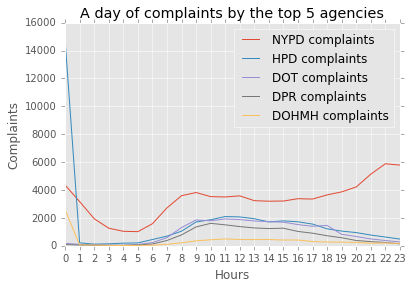

In [47]:
all_graph = df_NYPD.groupby(by= df_NYPD.index.hour).count().plot(y='Unique Key', label='NYPD complaints')
all_graph.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
all_graph.set_title("A day of complaints by the top 5 agencies")
all_graph.set_xlabel("Hours")
all_graph.set_ylabel("Complaints")


df_HPD.groupby(by= df_HPD.index.hour).count().plot(y='Unique Key', ax=all_graph , label='HPD complaints')

df_DOT.groupby(by= df_DOT.index.hour).count().plot(y='Unique Key', ax=all_graph , label='DOT complaints')

df_DPR.groupby(by= df_DPR.index.hour).count().plot(y='Unique Key', ax=all_graph , label='DPR complaints')

df_DOHMH.groupby(by= df_DOHMH.index.hour).count().plot(y='Unique Key', ax=all_graph , label='DOHMH complaints')



Graph those same agencies on an annual basis - make it **weekly**. When do people like to complain? When does the NYPD have an odd number of complaints?

May and June are the months with more complaints, followed by October, November and December. 
In May the NYPD and HPD have an odd number of complaints


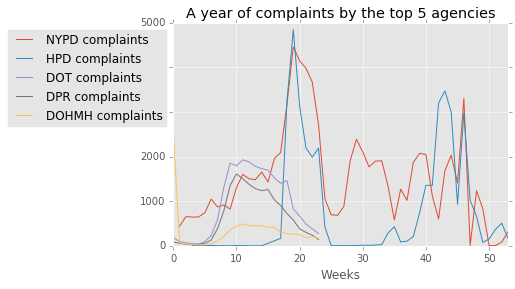

In [48]:
all_graph = df_NYPD.groupby(by= df_NYPD.index.weekofyear).count().plot(y='Unique Key', label='NYPD complaints')
#all_graph.set_xticks([1,50])
all_graph.set_title("A year of complaints by the top 5 agencies")
all_graph.set_xlabel("Weeks")

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

df_HPD.groupby(by= df_HPD.index.week).count().plot(y='Unique Key', ax=all_graph , label='HPD complaints')

df_DOT.groupby(by= df_DOT.index.hour).count().plot(y='Unique Key', ax=all_graph , label='DOT complaints')

df_DPR.groupby(by= df_DPR.index.hour).count().plot(y='Unique Key', ax=all_graph , label='DPR complaints')

df_DOHMH.groupby(by= df_DOHMH.index.hour).count().plot(y='Unique Key', ax=all_graph , label='DOHMH complaints')

plt.legend(bbox_to_anchor=(0, 1), loc='best', ncol=1)

print("""May and June are the months with more complaints, followed by October, November and December. 
In May the NYPD and HPD have an odd number of complaints""")


Maybe the NYPD deals with different issues at different times? Check the most popular complaints in July and August vs the month of May. Also check the most common complaints for the Housing Preservation Bureau (HPD) in winter vs. summer.

In [49]:
August_July = df["2015-07":"2015-08"]
August_July_complaints = August_July['Complaint Type'].value_counts().head(5)
August_July_complaints

Illegal Parking            3444
Blocked Driveway           3258
Noise - Street/Sidewalk    3165
Street Condition           1480
Noise - Commercial         1201
Name: Complaint Type, dtype: int64

In [50]:
May = df['2015-05']
May_complaints= May['Complaint Type'].value_counts().head(5)
May_complaints

Blocked Driveway           4114
Illegal Parking            3975
HEAT/HOT WATER             3583
Noise - Street/Sidewalk    3385
Noise - Commercial         2263
Name: Complaint Type, dtype: int64

In [51]:
# August_July_vs_May= August_July_complaints.plot(y='Unique Key', label='August - July complaints')
# August_July_vs_May.set_ylabel("Number of Complaints")
# August_July_vs_May.set_title("August-July vs May Complaints")
# May['Complaint Type'].value_counts().head(5).plot(y='Unique Key', ax=August_July_vs_May, label='May complaints')

# August_July_vs_May.set_xticks([1,2,3,4,5])
# August_July_vs_May.set_xticklabels(['Illegal Parking', 'Blocked Driveway', 'Noise - Street/Sidewalk', 'Street Condition', 'Noise - Commercial'])




In [52]:
#Most popular complaints of the HPD
df_HPD['Complaint Type'].value_counts().head(5)

HEAT/HOT WATER            12408
UNSANITARY CONDITION       4774
PAINT/PLASTER              4306
PLUMBING                   3388
HPD Literature Request     3305
Name: Complaint Type, dtype: int64

In [79]:
summer_complaints= df_HPD["2015-06":"2015-08"]['Complaint Type'].value_counts().head(5)
summer_complaints

HEAT/HOT WATER            617
UNSANITARY CONDITION      510
HPD Literature Request    462
PAINT/PLASTER             444
PLUMBING                  309
Name: Complaint Type, dtype: int64

In [80]:
winter_complaints= df_HPD["2015-01":"2015-02"]['Complaint Type'].value_counts().head(5)
winter_complaints

UNSANITARY CONDITION    8
GENERAL                 3
PAINT/PLASTER           3
APPLIANCE               2
WATER LEAK              2
Name: Complaint Type, dtype: int64

In [82]:
winter_complaints_dec= df_HPD["2015-12"]['Complaint Type'].value_counts().head(5)
winter_complaints_dec

HEAT/HOT WATER          353
UNSANITARY CONDITION    182
PLUMBING                138
PAINT/PLASTER           136
DOOR/WINDOW             103
Name: Complaint Type, dtype: int64

In [83]:
winter_results= df_HPD["2015-12"]['Complaint Type'].value_counts() + df_HPD["2015-01":"2015-02"]['Complaint Type'].value_counts()

In [84]:
winter_results

APPLIANCE                  32.0
DOOR/WINDOW                 NaN
ELECTRIC                    NaN
FLOORING/STAIRS            57.0
GENERAL                    66.0
HEAT/HOT WATER              NaN
HPD Literature Request      NaN
OUTSIDE BUILDING            NaN
PAINT/PLASTER             139.0
PLUMBING                  139.0
SAFETY                      NaN
UNSANITARY CONDITION      190.0
WATER LEAK                 88.0
Name: Complaint Type, dtype: float64